In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls "/content/gdrive/My Drive/Omdena Pandemic/dataset"

 bank-lending-rate-forecast.csv         ilostat_1.csv
 consumer_price_index.csv	        ilostat_2020_min_wages.csv
'COVID19EconomicImpact 10Mar2020.csv'   ilostat_2.csv
 CPI_monthly.csv		        ilostat_sex_rural.csv
 excahnge_rates.csv		        ilostat_tatest_area.csv
 exchange.csv			        minimum_wages_te.csv
 iHDI_cleaned.csv		       'minimum_wages_trading economics.gsheet'


In [0]:
drive = "/content/gdrive/My Drive/Omdena Pandemic/dataset/ilostat_sex_rural.csv"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv(drive)

In [59]:
data.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label
0,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Total,"Age (Youth, adults): 15+",Area type: National,2005,48.487,NaN
1,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Total,"Age (Youth, adults): 15+",Area type: Rural,2005,49.856,NaN
2,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Total,"Age (Youth, adults): 15+",Area type: Urban,2005,45.556,NaN
3,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Total,"Age (Youth, adults): 15-24",Area type: National,2005,40.933,NaN
4,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Total,"Age (Youth, adults): 15-24",Area type: Rural,2005,43.498,NaN


In [60]:
data['sex.label'].value_counts()

Sex: Male      49680
Sex: Female    49680
Sex: Total     49680
Name: sex.label, dtype: int64

In [61]:
data['time'].value_counts()

2024    7452
2023    7452
2006    7452
2007    7452
2008    7452
2009    7452
2010    7452
2011    7452
2012    7452
2013    7452
2014    7452
2015    7452
2016    7452
2017    7452
2018    7452
2019    7452
2020    7452
2021    7452
2022    7452
2005    7452
Name: time, dtype: int64

In [0]:
data = data[data['sex.label'] != 'Sex: Total']

In [63]:
data.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label
9,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15+",Area type: National,2005,78.820,NaN
10,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15+",Area type: Rural,2005,79.952,NaN
11,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15+",Area type: Urban,2005,76.366,NaN
12,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15-24",Area type: National,2005,64.512,NaN
13,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15-24",Area type: Rural,2005,68.136,NaN


In [64]:
data['sex.label'].value_counts()

Sex: Male      49680
Sex: Female    49680
Name: sex.label, dtype: int64

In [65]:
data['obs_status.label'].isnull().sum() #can drop obs_status.label

83787

In [66]:
data.shape

(99360, 9)

In [67]:
data.isnull().sum()

ref_area.label          0
indicator.label         0
source.label            0
sex.label               0
classif1.label          0
classif2.label          0
time                    0
obs_value               0
obs_status.label    83787
dtype: int64

In [0]:
#data['sex.label'].str.split(':',expand=True)
data[['label','from']] = data['classif2.label'].str.split(':',expand=True)

In [0]:
data[['label_1','Age']] = data['classif1.label'].str.split(':',expand=True)

In [0]:
#Sex label expand
data[['label_2','Sex']] = data['sex.label'].str.split(':',expand=True)

In [71]:
data.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,label,from,label_1,Age,label_2,Sex
9,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15+",Area type: National,2005,78.820,NaN,Area type,National,"Age (Youth, adults)",15+,Sex,Male
10,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15+",Area type: Rural,2005,79.952,NaN,Area type,Rural,"Age (Youth, adults)",15+,Sex,Male
11,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15+",Area type: Urban,2005,76.366,NaN,Area type,Urban,"Age (Youth, adults)",15+,Sex,Male
12,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15-24",Area type: National,2005,64.512,NaN,Area type,National,"Age (Youth, adults)",15-24,Sex,Male
13,Afghanistan,"Labour force participation rate by sex, age an...",AFG - ILO - ILO modelled estimates,Sex: Male,"Age (Youth, adults): 15-24",Area type: Rural,2005,68.136,NaN,Area type,Rural,"Age (Youth, adults)",15-24,Sex,Male


In [0]:
#let's do some dropping of columns - indicator.label, source.label, obs_status.label, label, sex.label
data = data.drop(['classif2.label','sex.label','label', 'indicator.label','source.label','obs_status.label','classif1.label','label_1','label_2'],axis=1)

In [73]:
data.head()

,ref_area.label,time,obs_value,from,Age,Sex
9,Afghanistan,2005,78.820,National,15+,Male
10,Afghanistan,2005,79.952,Rural,15+,Male
11,Afghanistan,2005,76.366,Urban,15+,Male
12,Afghanistan,2005,64.512,National,15-24,Male
13,Afghanistan,2005,68.136,Rural,15-24,Male


In [0]:
#renaming ref_area column and time column
data = data.rename(columns={'ref_area.label':'Country','time':'Year'})

In [75]:
data.head()

,Country,Year,obs_value,from,Age,Sex
9,Afghanistan,2005,78.820,National,15+,Male
10,Afghanistan,2005,79.952,Rural,15+,Male
11,Afghanistan,2005,76.366,Urban,15+,Male
12,Afghanistan,2005,64.512,National,15-24,Male
13,Afghanistan,2005,68.136,Rural,15-24,Male


In [0]:
#lets do some reindexing.
data=data.reindex(columns= ['Country', 'from', 'Age','Sex','Year','obs_value'])

In [77]:
data.head()

,Country,from,Age,Sex,Year,obs_value
9,Afghanistan,National,15+,Male,2005,78.820
10,Afghanistan,Rural,15+,Male,2005,79.952
11,Afghanistan,Urban,15+,Male,2005,76.366
12,Afghanistan,National,15-24,Male,2005,64.512
13,Afghanistan,Rural,15-24,Male,2005,68.136


In [78]:
data.dtypes

Country       object
from          object
Age           object
Sex           object
Year           int64
obs_value    float64
dtype: object

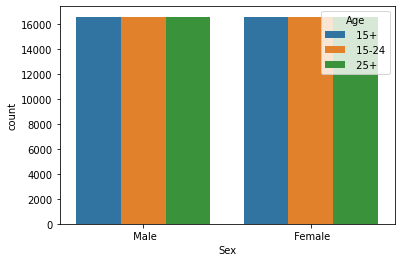

In [79]:
sns.countplot(x='Sex',hue='Age',data=data)

In [0]:
#taking only for year 2020 
data = data[data['Year'] == 2020]

In [81]:
data.head()

,Country,from,Age,Sex,Year,obs_value
414,Afghanistan,National,15+,Male,2020,74.614
415,Afghanistan,Rural,15+,Male,2020,75.373
416,Afghanistan,Urban,15+,Male,2020,72.582
417,Afghanistan,National,15-24,Male,2020,58.908
418,Afghanistan,Rural,15-24,Male,2020,61.788


In [82]:
data.shape

(4968, 6)

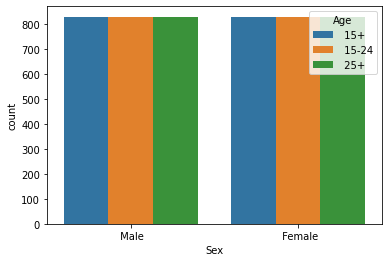

In [83]:
sns.countplot(x='Sex',hue='Age',data=data)

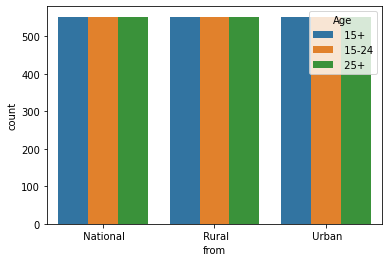

In [84]:
sns.countplot(x='from',hue='Age',data=data)

In [0]:
unique_countries = data.groupby('Country')['from'].nunique()

In [86]:
unique_countries

Country
ASEAN                          3
Afghanistan                    3
Africa                         3
Africa: Low income             3
Africa: Lower-middle income    3
                              ..
World: Lower-middle income     3
World: Upper-middle income     3
Yemen                          3
Zambia                         3
Zimbabwe                       3
Name: from, Length: 276, dtype: int64

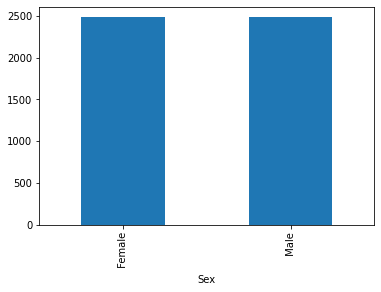

In [87]:
data.groupby(['Sex'])['obs_value'].count().plot(kind='bar')

In [88]:
data.groupby('Age')['obs_value'].count() 

Age
 15+      1656
 15-24    1656
 25+      1656
Name: obs_value, dtype: int64